In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score, roc_curve, auc
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [0]:
#open file into a dataframe
census = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

In [3]:
#exploring the data
census.describe()
census.info()
census.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
hours_per_week_bin    48842 non-null object
occupation_bin        48842 non-null object
msr_bin               48842 non-null object
capital_gl_bin        48842 non-null object
race_sex_bin          48842 non-null object
education_num_bin     48842 non-null object
education_bin         48842 non-null object
workclass_bin         48842 non-null object
age_bin               48842 non-null object
flag                  48842 non-null object
y                     48842 non-null int64
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [0]:
#split the data into training and testing dataset
variables = ['age_bin', 'capital_gl_bin', 'education_bin', 'hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']
x_train = census.loc[census['flag']=='train',variables]
y_train = census.loc[census['flag']=='train','y']
x_train = pd.get_dummies(x_train, columns=variables, drop_first=True)

x_test = census.loc[census['flag']=='test',variables]
y_test = census.loc[census['flag']=='test','y']
x_test = pd.get_dummies(x_test, columns=variables, drop_first=True)

Random Forest Classifier

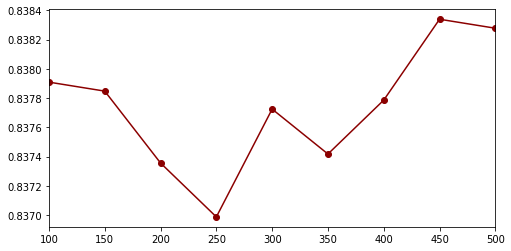

In [5]:
from sklearn.ensemble import RandomForestClassifier

results = []
n_estimators=[100,150,200,250,300,350,400,450,500]
for trees in n_estimators: 
    model = RandomForestClassifier(n_estimators=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimators).plot(color="darkred",marker="o")

In [24]:
#Best value estimator

rfc = RandomForestClassifier(n_estimators=450,random_state=101)
rfc.fit(x_train,y_train)

y_pred = rfc.predict(x_test)

rf_acc = accuracy_score(y_test,y_pred)
y_score=rfc.predict_proba(x_test)[:,1]
rf_auc = roc_auc_score(y_test,y_score)
print('Accuracy', rf_acc)
print('AUC',rf_auc)

Accuracy 0.8383391683557521
AUC 0.8807112533797694


Adaboost Classifier

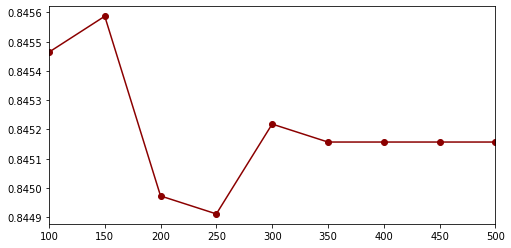

In [6]:
from sklearn.ensemble import AdaBoostClassifier

results = []
n_estimators=[100,150,200,250,300,350,400,450,500]
for trees in n_estimators: 
    model = AdaBoostClassifier(n_estimators=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimators).plot(color="darkred",marker="o")

In [26]:
#Best estimator value

ada = AdaBoostClassifier(n_estimators=150,random_state=101)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

ada_acc = accuracy_score(y_test,y_pred)
y_score=ada.predict_proba(x_test)[:,1]
ada_auc = roc_auc_score(y_test,y_score)

print('AUC',ada_auc)
print('Accuracy', ada_acc)

AUC 0.8972438374816858
Accuracy 0.8455868804127511


Gradient Boost Classifier

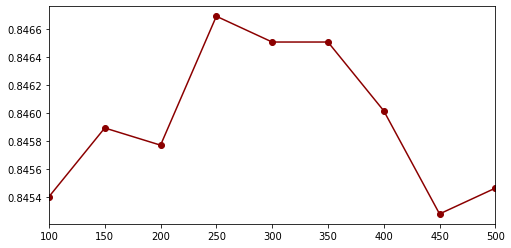

In [7]:
results = []
n_estimators=[100,150,200,250,300,350,400,450,500]
for trees in n_estimators: 
    model = GradientBoostingClassifier(n_estimators=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimators).plot(color="darkred",marker="o")

In [27]:
#best estimator value

gb = GradientBoostingClassifier(n_estimators=250,random_state=101)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

gb_acc = accuracy_score(y_test,y_pred)
y_score = gb.predict_proba(x_test)[:,1]
gb_auc = roc_auc_score(y_test, y_pred)

print('AUC', gb_auc)
print('Accuracy', gb_acc)

AUC 0.7567725025044427
Accuracy 0.8466924636078865


XBG Boost Classifier

In [0]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import datasets

results = []
n_estimators=[100,150,200,250,300,350,400,450,500]
for trees in n_estimators: 
    model = XGBClassifier(n_estimators=trees, objective='binary:logistic', random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimators).plot(color="darkred",marker="o")

#I was not able to receive an output for this model because I kept receiving this error, "feature_names may not contain [, ] or <"

## Compare Performance

In [0]:
data_dict = {'RandomForest':{'Accuracy':rf_acc,'AUC':rf_auc, 'Random_State':101,'n_estimator':450},'AdaBoost':{'Accuracy':ada_acc,'AUC':ada_auc,'Random_State':101,'n_estimator':150},
        'GradientBoost':{'Accuracy':gb_acc,'AUC':gb_auc,'Random_State':101,'n_estimator':250},'XGBoost':{'Accuracy': 0, 'AUC': 0, 'Random_State':101,'n_estimator':250}}

In [49]:
performance = pd.DataFrame(data_dict)
performance


,RandomForest,AdaBoost,GradientBoost,XGBoost
Accuracy,0.838339,0.845587,0.846692,0
AUC,0.880711,0.897244,0.756773,0
Random_State,101.000000,101.000000,101.000000,101
n_estimator,450.000000,150.000000,250.000000,250
